#Data Preprocessing and Initial Visualizations - Tyler Cho

In [ ]:
# Import pandas
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# Define the file path
# May need to adjust path based on where file is localized in your Drive
file_path = 'AAPL.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# No empty values in CSV; we can just normalize
# print(np.where(pd.isnull(df)))

# Isolate non-Date features (use to normalize data)
quant_df = df.select_dtypes(include=['float64', 'int64'])

### Normalization
# Note that the normalization techniques (transform, zscore) return formatted
# as numpy arrays; if that format is easier for you to work with, just call
# respective function on quant_df instead of creating new DataFrame object

# I've also added in two categorical features, Gain and Adj Gain; both classify
# each day as either a gain (1) or loss/no change (0) based on the difference
# between Close/Adj Close and Open values, respectively

gain = np.sign(quant_df['Close'] - quant_df['Open'])
gain[gain==-1] = 0

adj_gain = np.sign(quant_df['Adj Close'] - quant_df['Open'])
adj_gain[adj_gain==-1] = 0

# Min-Max normalization
scaler = MinMaxScaler()
scaler.fit(quant_df)
minmax_qdf = pd.DataFrame(scaler.transform(quant_df), columns=quant_df.columns)

minmax_qdf.insert(0, 'Date', df['Date'])
minmax_qdf.insert(len(minmax_qdf.columns), 'Gain', gain)
minmax_qdf.insert(len(minmax_qdf.columns), 'Adj Gain', adj_gain)
print(minmax_qdf)

# Z-Score normalization
zscore_qdf = pd.DataFrame(stats.zscore(quant_df), columns=quant_df.columns)

zscore_qdf.insert(0, 'Date', df['Date'])
zscore_qdf.insert(len(zscore_qdf.columns), 'Gain', gain)
zscore_qdf.insert(len(zscore_qdf.columns), 'Adj Gain', adj_gain)
print(zscore_qdf)

            Date      Open      High       Low     Close  Adj Close    Volume  \
0     1980-12-12  0.000970  0.000967  0.000981  0.000969   0.000768  0.063023   
1     1980-12-15  0.000894  0.000886  0.000898  0.000887   0.000703  0.023516   
2     1980-12-16  0.000784  0.000777  0.000787  0.000778   0.000616  0.014061   
3     1980-12-17  0.000812  0.000811  0.000822  0.000812   0.000644  0.011462   
4     1980-12-18  0.000853  0.000852  0.000863  0.000853   0.000676  0.009711   
...          ...       ...       ...       ...       ...        ...       ...   
9904  2020-03-26  0.758983  0.788891  0.761754  0.789727   0.789753  0.033786   
9905  2020-03-27  0.778179  0.780315  0.763889  0.757006   0.757036  0.027334   
9906  2020-03-30  0.771986  0.779247  0.771161  0.778626   0.778654  0.022450   
9907  2020-03-31  0.786961  0.800520  0.779207  0.777036   0.777064  0.026362   
9908  2020-04-01  0.758921  0.758493  0.739381  0.736119   0.736152  0.023508   

      Gain  Adj Gain  
0   

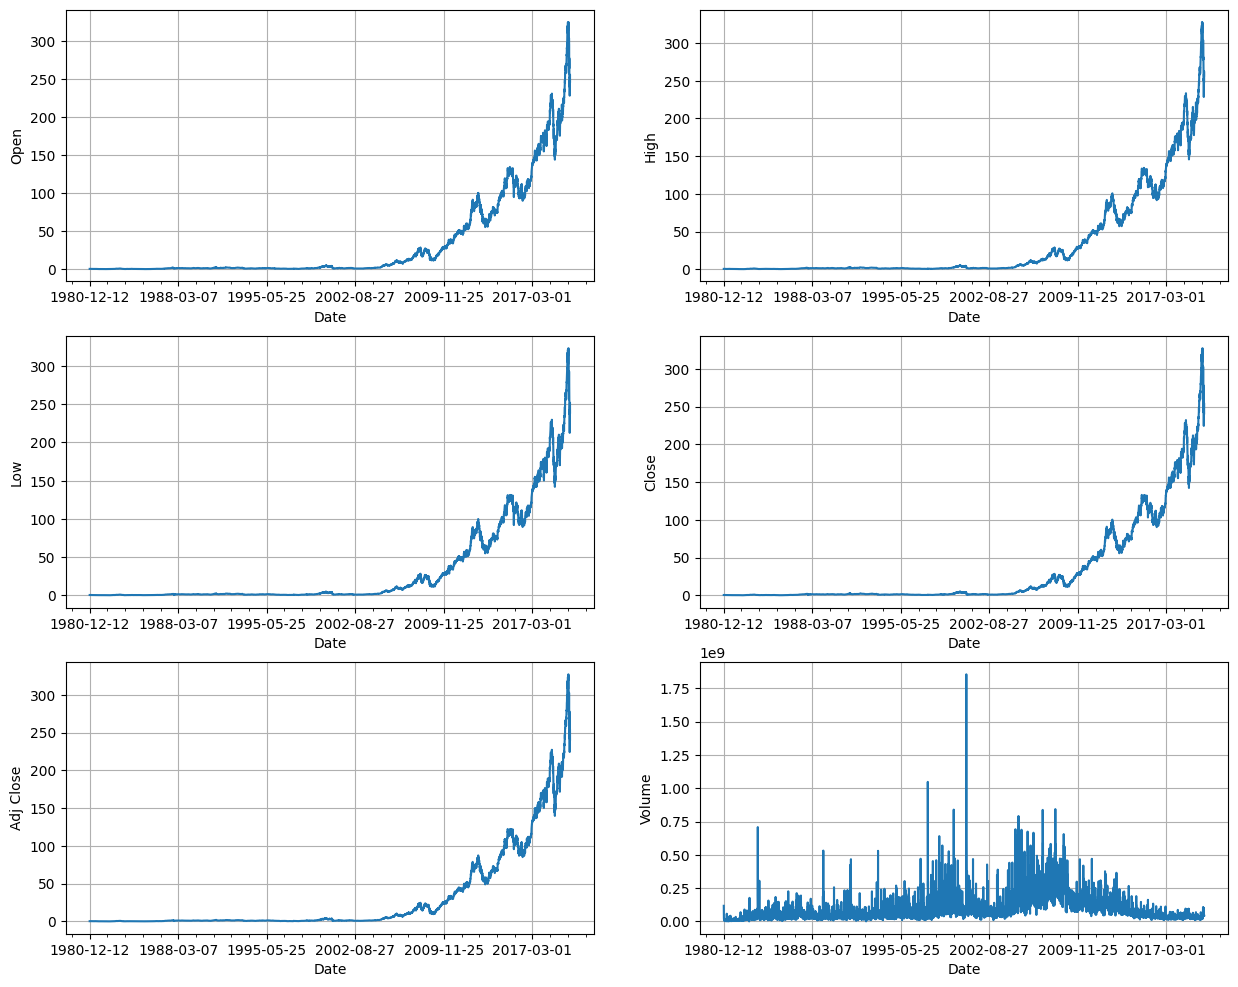

In [ ]:
# Original Data Visualizations: Date vs. Feature
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Plot Feature vs. Date for each feature
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,12))

features = list(df.columns)[1:]

for i in range(axs.shape[0]):
  for j in range(axs.shape[1]):
    axs[i][j].plot('Date', features[2*i+j], data=df)
    axs[i][j].xaxis.set_major_locator(mdates.YearLocator(5, month=1, day=1))
    axs[i][j].xaxis.set_minor_locator(mdates.YearLocator(1, month=1, day=1))
    axs[i][j].grid(True)
    axs[i][j].set_ylabel(features[2*i+j])
    axs[i][j].set_xlabel('Date')

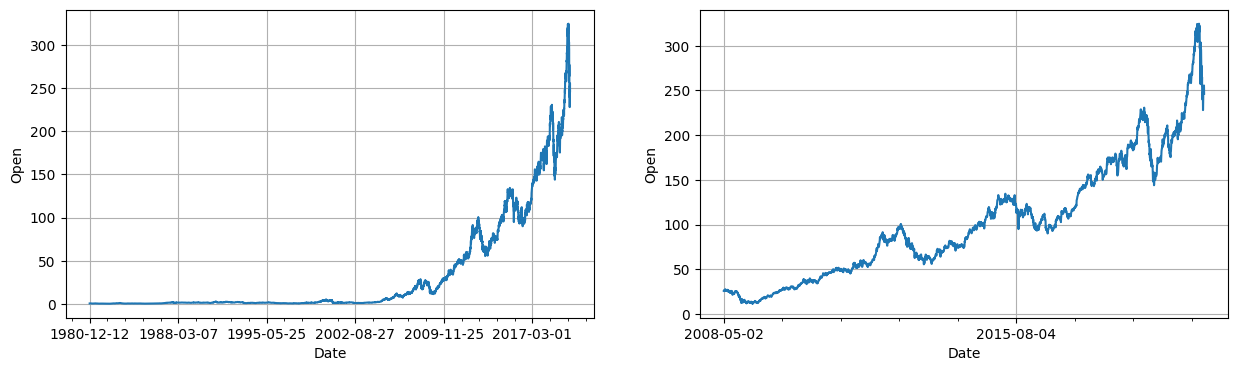

In [ ]:
# Conclusion visualizations

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,4))

axs[0].plot('Date', 'Open', data=df)
axs[1].plot('Date', 'Open', data=df.tail(3000))

for i in range(0, 2):
  axs[i].xaxis.set_major_locator(mdates.YearLocator(5, month=1, day=1))
  axs[i].xaxis.set_minor_locator(mdates.YearLocator(1, month=1, day=1))
  axs[i].grid(True)
  axs[i].set_ylabel('Open')
  axs[i].set_xlabel('Date')

#KNN Classification Model for Adj Gain - Alicia Yu

Initially, only k-values from 1-10 were used during cross-validation:

Predictors: all (High, Low, Close, Volume)
k = 1: Cross-validation scores = [0.98865069 0.98928121 0.98675079 0.98927445 0.98864353], Mean = 0.9885201347755002
k = 2: Cross-validation scores = [0.98991173 0.98991173 0.9873817  0.98801262 0.9873817 ], Mean = 0.9885198960939767
k = 3: Cross-validation scores = [0.98865069 0.98991173 0.98801262 0.98675079 0.98990536], Mean = 0.9886462381802922
k = 4: Cross-validation scores = [0.98991173 0.99054224 0.98927445 0.98675079 0.99053628], Mean = 0.989403097290567
k = 5: Cross-validation scores = [0.98928121 0.98991173 0.98801262 0.98548896 0.98990536], Mean = 0.9885199756544847
k = 6: Cross-validation scores = [0.98865069 0.98991173 0.98927445 0.98611987 0.98927445], Mean = 0.9886462381802922
k = 7: Cross-validation scores = [0.98928121 0.98928121 0.98927445 0.98548896 0.98990536], Mean = 0.9886462381802922
k = 8: Cross-validation scores = [0.98865069 0.98928121 0.98801262 0.98675079 0.98927445], Mean = 0.9883939518102004
k = 9: Cross-validatio

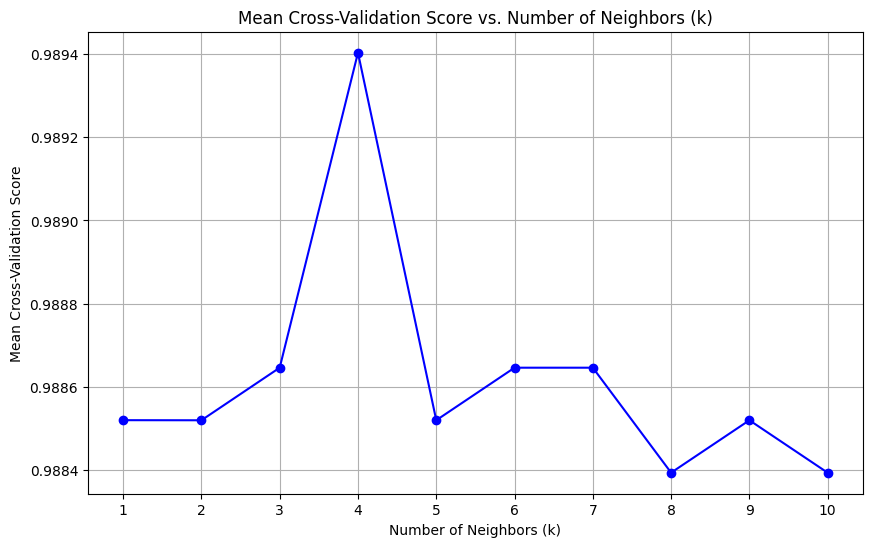

Predictors: High, Low
k = 1: Cross-validation scores = [0.98549811 0.98738966 0.98548896 0.98359621 0.9873817 ], Mean = 0.9858709289882688
k = 2: Cross-validation scores = [0.98738966 0.98928121 0.98675079 0.9873817  0.98927445], Mean = 0.9880155620353168
k = 3: Cross-validation scores = [0.98865069 0.99117276 0.98864353 0.98359621 0.98675079], Mean = 0.9877627983021787
k = 4: Cross-validation scores = [0.98928121 0.98991173 0.98864353 0.98485804 0.98675079], Mean = 0.9878890608279862
k = 5: Cross-validation scores = [0.98802018 0.98928121 0.98864353 0.98359621 0.98990536], Mean = 0.9878892995095094
k = 6: Cross-validation scores = [0.98865069 0.98928121 0.98801262 0.98359621 0.98927445], Mean = 0.9877630369837019
k = 7: Cross-validation scores = [0.98802018 0.98928121 0.98927445 0.98548896 0.98990536], Mean = 0.9883940313707082
k = 8: Cross-validation scores = [0.98802018 0.98991173 0.98801262 0.9873817  0.98864353], Mean = 0.9883939518102004
k = 9: Cross-validation scores = [0.988650

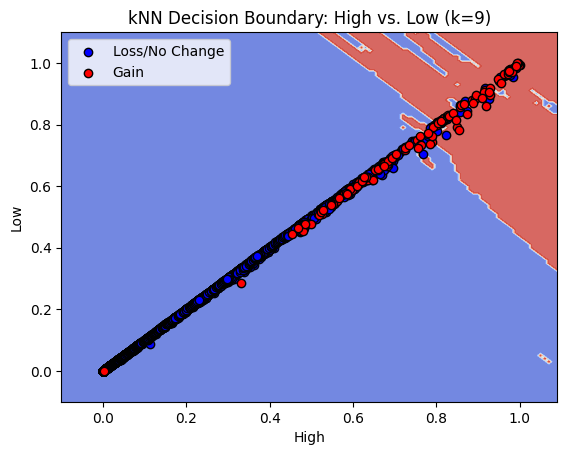

Predictors: High, Close
k = 1: Cross-validation scores = [0.98738966 0.99117276 0.98801262 0.98233438 0.98485804], Mean = 0.9867534937007967
k = 2: Cross-validation scores = [0.99054224 0.99117276 0.99053628 0.9873817  0.98927445], Mean = 0.9897814870654503
k = 3: Cross-validation scores = [0.99117276 0.9924338  0.9873817  0.98485804 0.98990536], Mean = 0.9891503335574287
k = 4: Cross-validation scores = [0.99180328 0.99180328 0.98864353 0.98422713 0.98801262], Mean = 0.9888979676268294
k = 5: Cross-validation scores = [0.98991173 0.99054224 0.98927445 0.9829653  0.98990536], Mean = 0.9885198165334691
k = 6: Cross-validation scores = [0.98991173 0.99054224 0.99053628 0.98359621 0.98801262], Mean = 0.9885198165334691
k = 7: Cross-validation scores = [0.99054224 0.98928121 0.99116719 0.9829653  0.99053628], Mean = 0.9888984449898759
k = 8: Cross-validation scores = [0.98991173 0.98928121 0.98927445 0.98422713 0.98990536], Mean = 0.9885199756544847
k = 9: Cross-validation scores = [0.9918

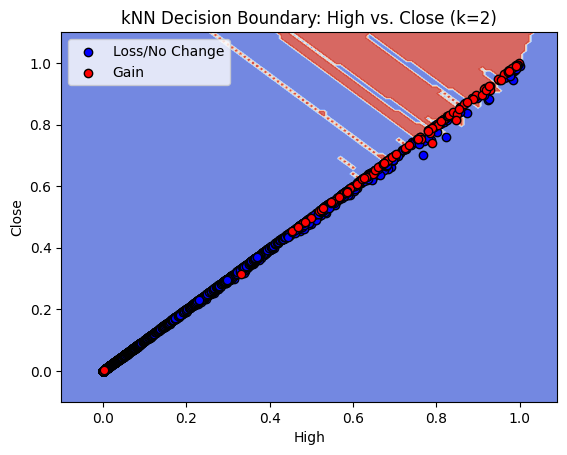

Predictors: High, Volume
k = 1: Cross-validation scores = [0.98612863 0.98486759 0.98359621 0.97981073 0.98422713], Mean = 0.9837260572596975
k = 2: Cross-validation scores = [0.98865069 0.98991173 0.98611987 0.98422713 0.98675079], Mean = 0.9871320425966958
k = 3: Cross-validation scores = [0.98865069 0.98991173 0.9873817  0.98170347 0.98611987], Mean = 0.9867534937007967
k = 4: Cross-validation scores = [0.98802018 0.98991173 0.9873817  0.98359621 0.98801262], Mean = 0.987384488087803
k = 5: Cross-validation scores = [0.98738966 0.98738966 0.98864353 0.98233438 0.98864353], Mean = 0.9868801540291429
k = 6: Cross-validation scores = [0.98802018 0.98928121 0.9873817  0.9829653  0.98864353], Mean = 0.9872583846830111
k = 7: Cross-validation scores = [0.98991173 0.98928121 0.98927445 0.98359621 0.98990536], Mean = 0.988393792689185
k = 8: Cross-validation scores = [0.98802018 0.99054224 0.98801262 0.98359621 0.98990536], Mean = 0.9880153233537936
k = 9: Cross-validation scores = [0.99054

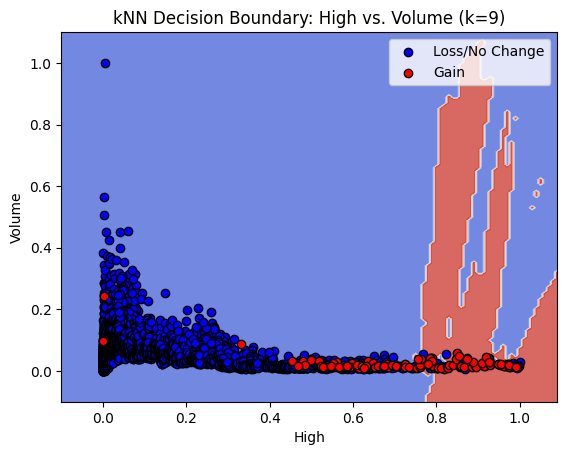

Predictors: Low, Close
k = 1: Cross-validation scores = [0.99054224 0.99117276 0.98990536 0.98675079 0.98927445], Mean = 0.989529121134851
k = 2: Cross-validation scores = [0.99054224 0.99117276 0.98864353 0.98864353 0.98927445], Mean = 0.9896553041001507
k = 3: Cross-validation scores = [0.99180328 0.99306431 0.9873817  0.9873817  0.98864353], Mean = 0.9896549062976121
k = 4: Cross-validation scores = [0.99180328 0.98991173 0.9873817  0.98990536 0.98801262], Mean = 0.9894029381695514
k = 5: Cross-validation scores = [0.99054224 0.99117276 0.9873817  0.98611987 0.98864353], Mean = 0.988772023343053
k = 6: Cross-validation scores = [0.98802018 0.98991173 0.98801262 0.98675079 0.98927445], Mean = 0.9883939518102004
k = 7: Cross-validation scores = [0.98991173 0.98991173 0.98927445 0.98675079 0.98990536], Mean = 0.9891508109204754
k = 8: Cross-validation scores = [0.98928121 0.98991173 0.98801262 0.98801262 0.98927445], Mean = 0.9888985245503836
k = 9: Cross-validation scores = [0.9892812

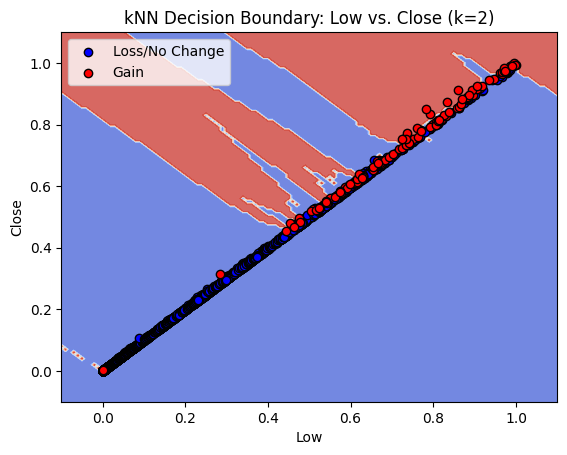

Predictors: Low, Volume
k = 1: Cross-validation scores = [0.98360656 0.98549811 0.98044164 0.9829653  0.98485804], Mean = 0.9834739300106212
k = 2: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98927445 0.98801262], Mean = 0.988268007526424
k = 3: Cross-validation scores = [0.98675914 0.98865069 0.9873817  0.98422713 0.98864353], Mean = 0.9871324403992346
k = 4: Cross-validation scores = [0.98928121 0.98928121 0.98927445 0.98675079 0.98801262], Mean = 0.9885200552149923
k = 5: Cross-validation scores = [0.98928121 0.99180328 0.9873817  0.98485804 0.98927445], Mean = 0.9885197369729614
k = 6: Cross-validation scores = [0.98865069 0.99054224 0.98801262 0.98675079 0.98801262], Mean = 0.988393792689185
k = 7: Cross-validation scores = [0.98991173 0.98991173 0.98927445 0.98422713 0.98990536], Mean = 0.9886460790592766
k = 8: Cross-validation scores = [0.98928121 0.98928121 0.98927445 0.98611987 0.98801262], Mean = 0.9883938722496927
k = 9: Cross-validation scores = [0.988650

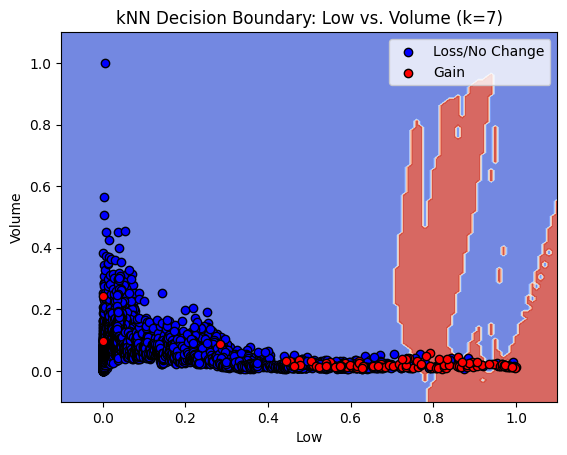

Predictors: Close, Volume
k = 1: Cross-validation scores = [0.98360656 0.98865069 0.98422713 0.98107256 0.98485804], Mean = 0.9844829959304802
k = 2: Cross-validation scores = [0.98802018 0.98928121 0.9873817  0.9873817  0.98801262], Mean = 0.9880154824748091
k = 3: Cross-validation scores = [0.99054224 0.98865069 0.98359621 0.98422713 0.9873817 ], Mean = 0.9868795971055887
k = 4: Cross-validation scores = [0.99180328 0.98928121 0.98864353 0.98611987 0.98864353], Mean = 0.9888982858688605
k = 5: Cross-validation scores = [0.99180328 0.98928121 0.9873817  0.98422713 0.98927445], Mean = 0.9883935540076617
k = 6: Cross-validation scores = [0.99054224 0.98991173 0.98927445 0.98422713 0.98927445], Mean = 0.9886459994987689
k = 7: Cross-validation scores = [0.99117276 0.98865069 0.98801262 0.98548896 0.98990536], Mean = 0.9886460790592766
k = 8: Cross-validation scores = [0.99054224 0.98865069 0.98864353 0.98611987 0.98990536], Mean = 0.988772341585084
k = 9: Cross-validation scores = [0.990

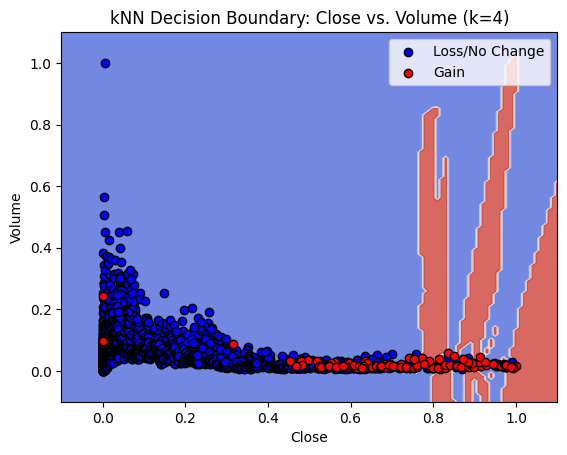

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score

# TESTING ALL POSSIBLE FEATURES
# Define X and Y
X = minmax_qdf.iloc[:,[2,3,4,6]].values
y = minmax_qdf['Adj Gain'].values.ravel() # adj gain is the target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Perform cross-validation for multiple k-values
mean_scores = []
k_values = range(1, 11)
max_score = 0
best_k = 1

print("Predictors: all (High, Low, Close, Volume)")

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # Added cv=5 for 5-fold cross-validation
    mean_score = np.mean(scores)
    mean_scores.append(mean_score)
    if mean_score > max_score:
        max_score = mean_score
        best_k = k
    print(f"k = {k}: Cross-validation scores = {scores}, Mean = {mean_score}")

# Print the mean cross-validation scores for all k values
print("Mean cross-validation scores for different k values:", mean_scores)
print("Best k:", best_k)

# Fit model with best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# plot mean cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Score')
plt.title('Mean Cross-Validation Score vs. Number of Neighbors (k)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# TESTING 2 FEATURES AT A TIME
cols = [[2,3], [2,4], [2,6],
    [3,4], [3,6], [4,6]]

features = list(minmax_qdf.columns)

for col in cols:
  # Define X and Y
  X = minmax_qdf.iloc[:,[col[0], col[1]]].values
  y = minmax_qdf['Adj Gain'].values.ravel() # adj gain is the target

  # Train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

  # Perform cross-validation for multiple k-values
  mean_scores = []
  k_values = range(1, 11)
  max_score = 0
  best_k = 1

  print(f"Predictors: {features[col[0]]}, {features[col[1]]}")

  for k in k_values:
      knn = KNeighborsClassifier(n_neighbors=k)
      scores = cross_val_score(knn, X_train, y_train, cv=5)  # Added cv=5 for 5-fold cross-validation
      mean_score = np.mean(scores)
      mean_scores.append(mean_score)
      if mean_score > max_score:
          max_score = mean_score
          best_k = k
      print(f"k = {k}: Cross-validation scores = {scores}, Mean = {mean_score}")

  # Print the mean cross-validation scores for all k values
  print("Mean cross-validation scores for different k values:", mean_scores)
  print("Best k:", best_k)

  # Fit model with best k
  knn = KNeighborsClassifier(n_neighbors=best_k)
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)
  print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

  # Define the mesh grid range
  h = 0.01  # step size in the mesh
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

  # Predict class using data and kNN classifier
  Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
  # Plot losses
  plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Loss/No Change', edgecolor='k', marker='o')
  # Plot gains
  plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Gain', edgecolor='k', marker='o')
  plt.xlabel(features[col[0]])
  plt.ylabel(features[col[1]])
  plt.title(f'kNN Decision Boundary: {features[col[0]]} vs. {features[col[1]]} (k={best_k})')
  plt.legend()
  plt.show()

Later, k-values from 25 to 250 were used to improve the decision boundaries:

Predictors: all (High, Low, Close, Volume)
k = 25: Cross-validation scores = [0.99117276 0.98991173 0.99179811 0.98675079 0.99053628], Mean = 0.9900339325565577
k = 50: Cross-validation scores = [0.99054224 0.98991173 0.99053628 0.98675079 0.99053628], Mean = 0.9896554632211663
k = 75: Cross-validation scores = [0.98991173 0.98928121 0.99116719 0.98864353 0.98864353], Mean = 0.9895294393768822
k = 100: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 125: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 150: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 175: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 200: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 225:

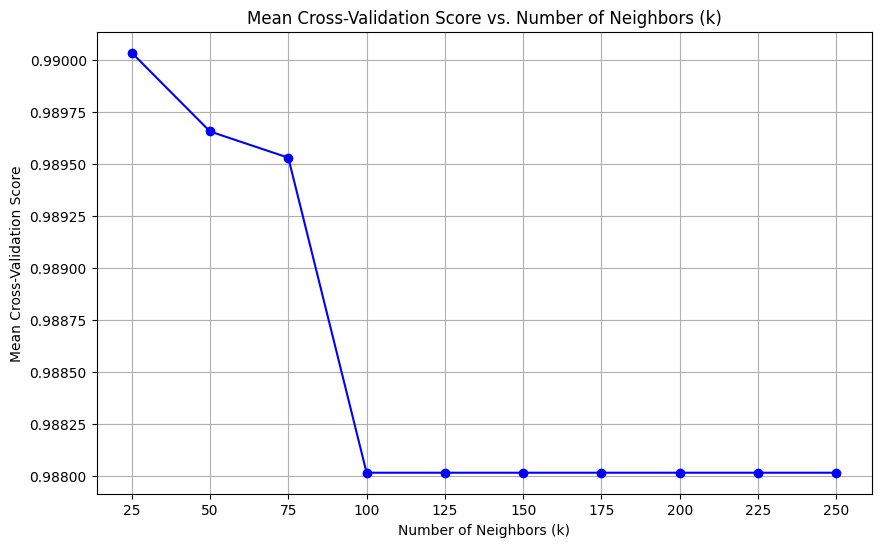

Predictors: High, Low
k = 25: Cross-validation scores = [0.99117276 0.98991173 0.99116719 0.98611987 0.99053628], Mean = 0.9897815666259582
k = 50: Cross-validation scores = [0.99054224 0.98991173 0.99053628 0.98675079 0.99053628], Mean = 0.9896554632211663
k = 75: Cross-validation scores = [0.98991173 0.98928121 0.99116719 0.9873817  0.98864353], Mean = 0.9892770734462827
k = 100: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 125: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 150: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 175: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 200: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 225: Cross-validation sco

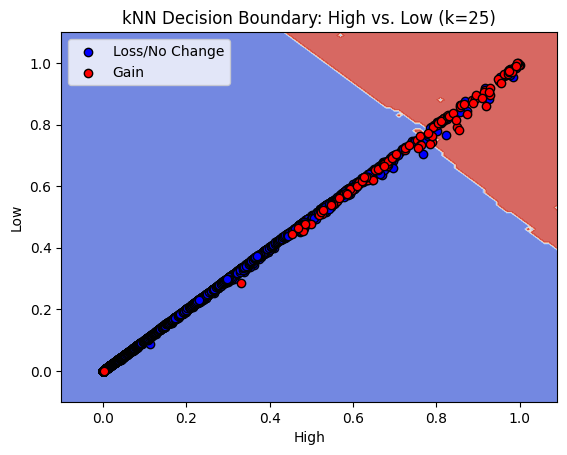

Predictors: High, Close
k = 25: Cross-validation scores = [0.99117276 0.98991173 0.99179811 0.98675079 0.99053628], Mean = 0.9900339325565577
k = 50: Cross-validation scores = [0.99054224 0.99054224 0.99053628 0.9873817  0.98990536], Mean = 0.9897815666259582
k = 75: Cross-validation scores = [0.98991173 0.98928121 0.99116719 0.98864353 0.98864353], Mean = 0.9895294393768822
k = 100: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 125: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 150: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 175: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 200: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 225: Cross-validation s

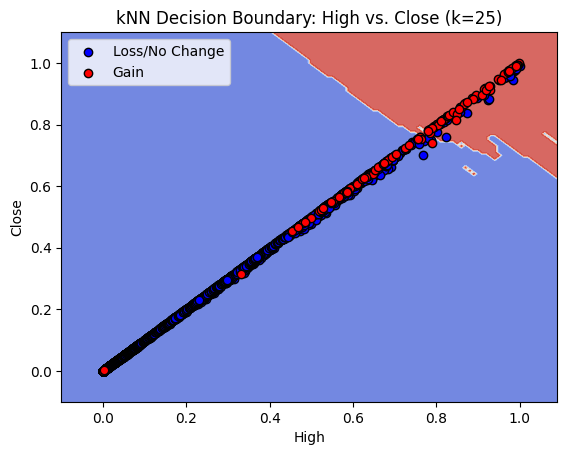

Predictors: High, Volume
k = 25: Cross-validation scores = [0.99117276 0.98991173 0.99179811 0.98611987 0.99053628], Mean = 0.9899077495912578
k = 50: Cross-validation scores = [0.99054224 0.99054224 0.99053628 0.9873817  0.98990536], Mean = 0.9897815666259582
k = 75: Cross-validation scores = [0.98991173 0.98991173 0.99116719 0.98801262 0.98864353], Mean = 0.9895293598163744
k = 100: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 125: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 150: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 175: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 200: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 225: Cross-validation 

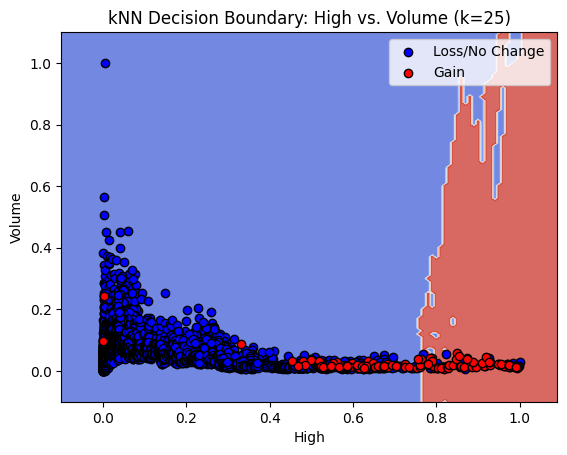

Predictors: Low, Close
k = 25: Cross-validation scores = [0.99117276 0.98991173 0.99179811 0.98675079 0.99053628], Mean = 0.9900339325565577
k = 50: Cross-validation scores = [0.99117276 0.98991173 0.99053628 0.98675079 0.98990536], Mean = 0.9896553836606585
k = 75: Cross-validation scores = [0.98991173 0.98928121 0.99116719 0.9873817  0.98864353], Mean = 0.9892770734462827
k = 100: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 125: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 150: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 175: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 200: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 225: Cross-validation sc

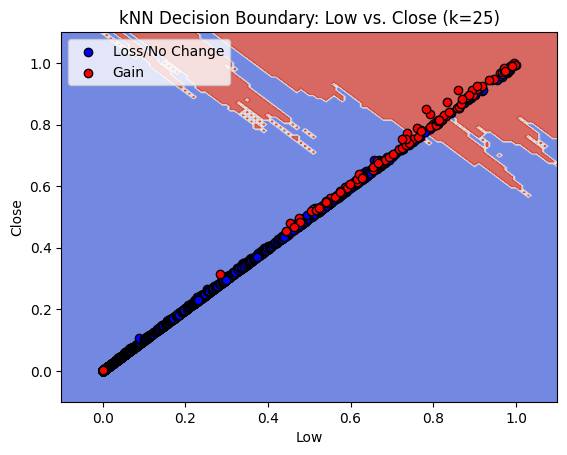

Predictors: Low, Volume
k = 25: Cross-validation scores = [0.99117276 0.98991173 0.99179811 0.98611987 0.99116719], Mean = 0.9900339325565577
k = 50: Cross-validation scores = [0.99117276 0.98991173 0.99053628 0.98611987 0.98990536], Mean = 0.9895292006953589
k = 75: Cross-validation scores = [0.98928121 0.98928121 0.99116719 0.98801262 0.98864353], Mean = 0.9892771530067904
k = 100: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 125: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 150: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 175: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 200: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 225: Cross-validation s

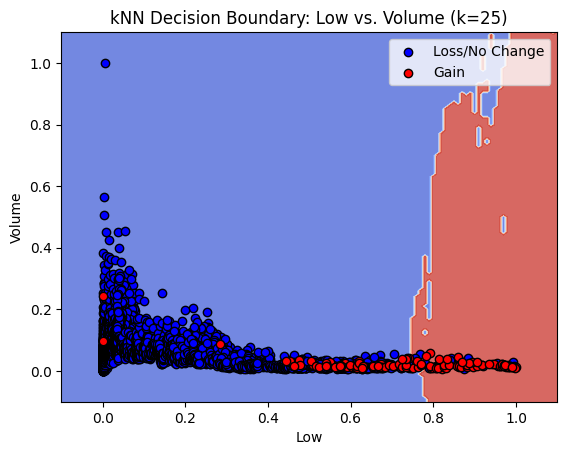

Predictors: Close, Volume
k = 25: Cross-validation scores = [0.99117276 0.98991173 0.99179811 0.98801262 0.99053628], Mean = 0.990286298487157
k = 50: Cross-validation scores = [0.99054224 0.99054224 0.99053628 0.9873817  0.98990536], Mean = 0.9897815666259582
k = 75: Cross-validation scores = [0.98991173 0.98928121 0.99116719 0.98864353 0.98864353], Mean = 0.9895294393768822
k = 100: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98864353 0.98801262], Mean = 0.9881418245611243
k = 125: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 150: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 175: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 200: Cross-validation scores = [0.98802018 0.98802018 0.98801262 0.98801262 0.98801262], Mean = 0.9880156415958247
k = 225: Cross-validation 

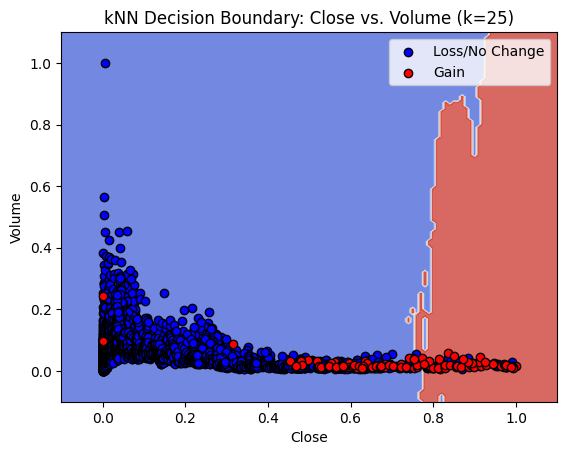

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score

# TESTING ALL POSSIBLE FEATURES
# Define X and Y
X = minmax_qdf.iloc[:,[2,3,4,6]].values
y = minmax_qdf['Adj Gain'].values.ravel() # adj gain is the target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Perform cross-validation for multiple k-values
mean_scores = []
k_values = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
max_score = 0
best_k = 1

print("Predictors: all (High, Low, Close, Volume)")

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5)  # Added cv=5 for 5-fold cross-validation
    mean_score = np.mean(scores)
    mean_scores.append(mean_score)
    if mean_score > max_score:
        max_score = mean_score
        best_k = k
    print(f"k = {k}: Cross-validation scores = {scores}, Mean = {mean_score}")

# Print the mean cross-validation scores for all k values
print("Mean cross-validation scores for different k values:", mean_scores)
print("Best k:", best_k)

# Fit model with best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# plot mean cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Score')
plt.title('Mean Cross-Validation Score vs. Number of Neighbors (k)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# TESTING 2 FEATURES AT A TIME
cols = [[2,3], [2,4], [2,6],
    [3,4], [3,6], [4,6]]

features = list(minmax_qdf.columns)

for col in cols:
  # Define X and Y
  X = minmax_qdf.iloc[:,[col[0], col[1]]].values
  y = minmax_qdf['Adj Gain'].values.ravel() # adj gain is the target

  # Train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

  # Perform cross-validation for multiple k-values
  mean_scores = []
  k_values = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
  max_score = 0
  best_k = 1

  print(f"Predictors: {features[col[0]]}, {features[col[1]]}")

  for k in k_values:
      knn = KNeighborsClassifier(n_neighbors=k)
      scores = cross_val_score(knn, X_train, y_train, cv=5)  # Added cv=5 for 5-fold cross-validation
      mean_score = np.mean(scores)
      mean_scores.append(mean_score)
      if mean_score > max_score:
          max_score = mean_score
          best_k = k
      print(f"k = {k}: Cross-validation scores = {scores}, Mean = {mean_score}")

  # Print the mean cross-validation scores for all k values
  print("Mean cross-validation scores for different k values:", mean_scores)
  print("Best k:", best_k)

  # Fit model with best k
  knn = KNeighborsClassifier(n_neighbors=best_k)
  knn.fit(X_train, y_train)

  y_pred = knn.predict(X_test)
  print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

  # Define the mesh grid range
  h = 0.01  # step size in the mesh
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))

  # Predict class using data and kNN classifier
  Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
  # Plot losses
  plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Loss/No Change', edgecolor='k', marker='o')
  # Plot gains
  plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Gain', edgecolor='k', marker='o')
  plt.xlabel(features[col[0]])
  plt.ylabel(features[col[1]])
  plt.title(f'kNN Decision Boundary: {features[col[0]]} vs. {features[col[1]]} (k={best_k})')
  plt.legend()
  plt.show()

#Random Forest Grid Search Trees - TAM VO

R2 score: 0.9994256292703357
Best parameters: {'max_depth': None, 'max_features': None, 'n_estimators': 100}
R2 score: 0.9998827504706332


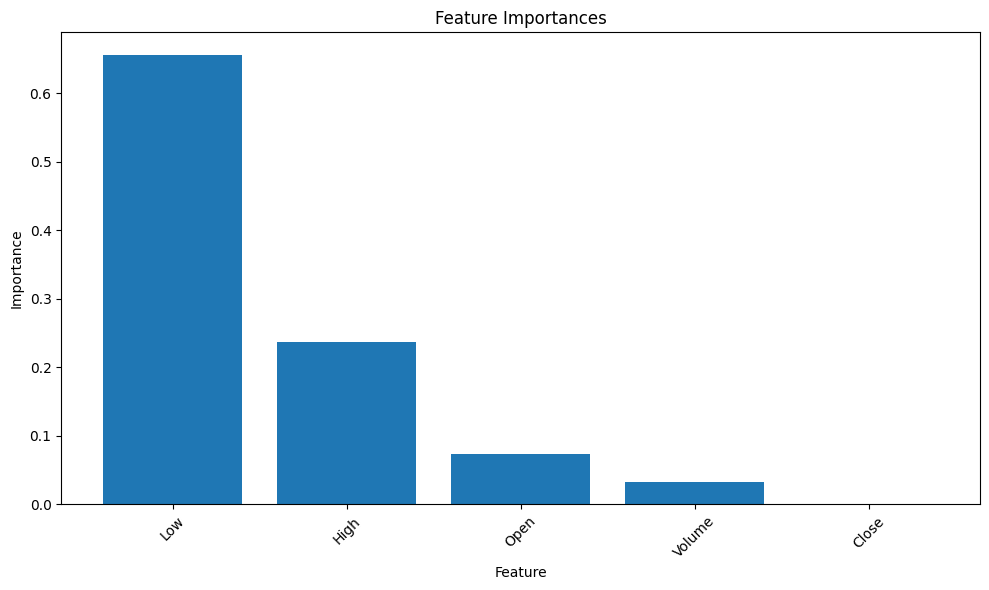

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

x = minmax_qdf.iloc[:, [1, 2, 3, 4, 6]].values
y = minmax_qdf['Adj Close'].values.ravel()

#training the models here
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

rf = RandomForestRegressor(n_estimators=100, max_depth=5,  max_features= 2, random_state=10)
rf.fit(x_train, y_train)

y_predict = rf.predict(x_test)
r2 = r2_score(y_test, y_predict)
print("R2 score:", r2)


#grid here n_estimator the larger numbers you have will have better results and max dept of the tree
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}


# doing the grid search on the tree
rf = RandomForestRegressor()
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# selecting the best estimator based on data set
random_search = grid_search.best_estimator_
# prediction of the random forest
y_predict = random_search.predict(x_test)
#gets the best r2 score to see if the model working good or not
best_r2 = r2_score(y_test, y_predict)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("R2 score:", best_r2)

importances = best_model.feature_importances_
indices = np.argsort(importances)

# the bar chart displays the importance of each feature in predicting the adjusted closing price
# If you have feature names, replace the range below with the actual feature names
feature_names = ['Volume', 'Open', 'High', 'Low','Close']

# Sort the features by importance
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x.shape[1]), importances[sorted_indices], align="center")
plt.xticks(range(x.shape[1]), [feature_names[i] for i in sorted_indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Logistic Regression - Jermaine Xie

Accuracy: 0.5403632694248234
Classification Report:
               precision    recall  f1-score   support

         0.0       0.55      0.86      0.67      1071
         1.0       0.50      0.16      0.24       911

    accuracy                           0.54      1982
   macro avg       0.52      0.51      0.46      1982
weighted avg       0.53      0.54      0.47      1982

ROC-AUC Score: 0.5875034975570909
Confusion Matrix:
 [[925 146]
 [765 146]]


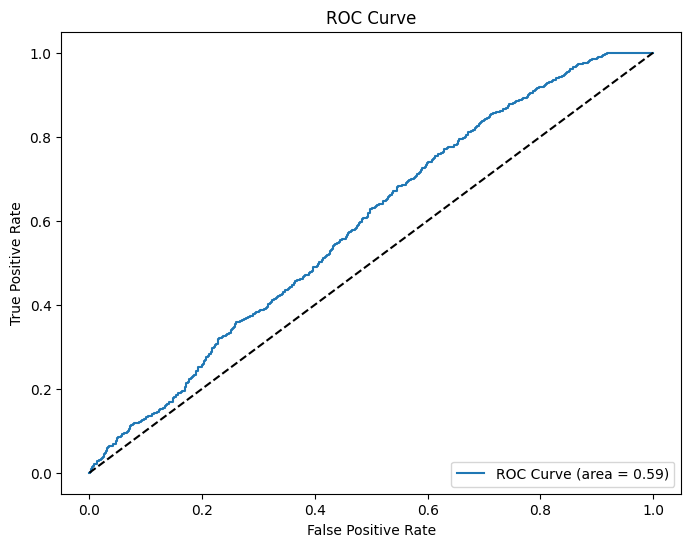

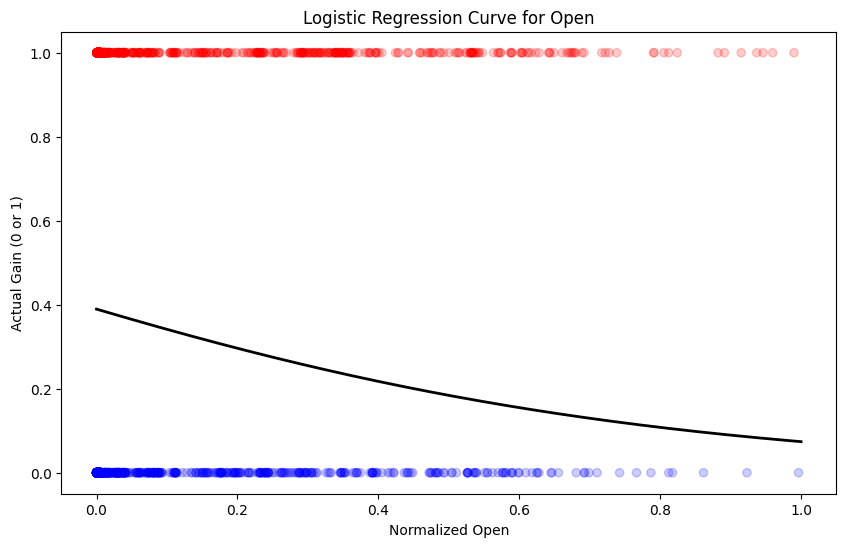

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


features = quant_df.columns.tolist()
X = minmax_qdf[features]
y = minmax_qdf['Gain']

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predicting the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# The calculation of evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)
print("ROC-AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


# Plotting the logistic regression curve
feature_index = 0
feature_name = features[feature_index]

# Values for the chosen feature
X_range = np.linspace(X[feature_name].min(), X[feature_name].max(), 300)

# Probabilities for the logistic curve
log_odds = model.intercept_ + model.coef_[0][feature_index] * X_range
probabilities = 1 / (1 + np.exp(-log_odds))

plt.figure(figsize=(10, 6))
plt.scatter(X_test[feature_name], y_test, alpha=0.2, c=y_test, cmap='bwr')
plt.xlabel(f'Normalized {feature_name}')
plt.ylabel('Actual Gain (0 or 1)')
plt.title(f'Logistic Regression Curve for {feature_name}')

plt.plot(X_range, probabilities, color='black', lw=2)
plt.show()

# Polynomial Regression: James Feeney#


### 1. Linear Regression ###
Start by training a simple linear model (polynomial degree 1) and inspect performance.



R2 Score: 0.9982923125444688


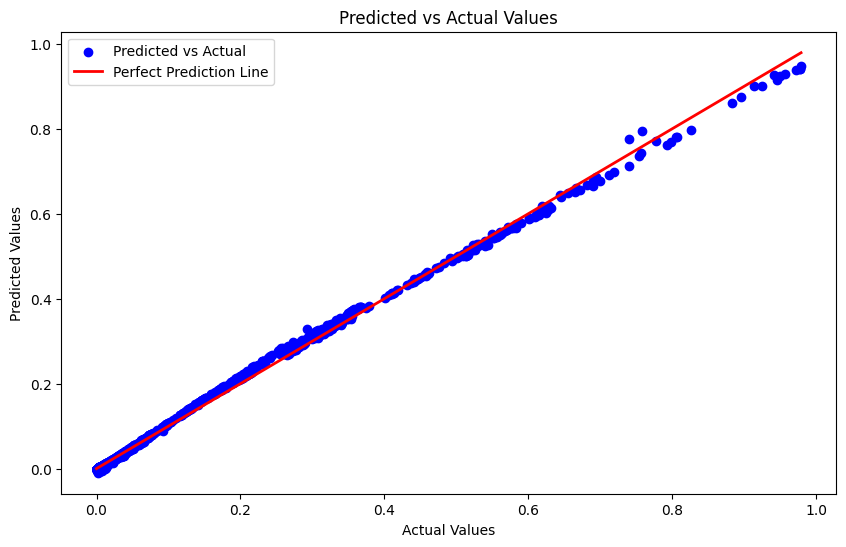

In [ ]:
# Imports
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

degree = 1

# Define the features and target
X = minmax_qdf.iloc[:, [1, 2, 3, 6]].values
y = minmax_qdf['Adj Close'].values.ravel()

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Fit a linear model (degree 1)
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f'R2 Score: {r2}')

# Plot the predicted vs actual values (with a perfect prediction line)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()

### 2. Higher-Degree Polynomial Regression

Utilize cross validation to find the optimal polynomial degree for the regression model.

Best Polynomial Degree: 3
R2 Score Averaged Across 10 Folds: 0.9997259554765039
R2 Score on Test Data: 0.9995531139451894


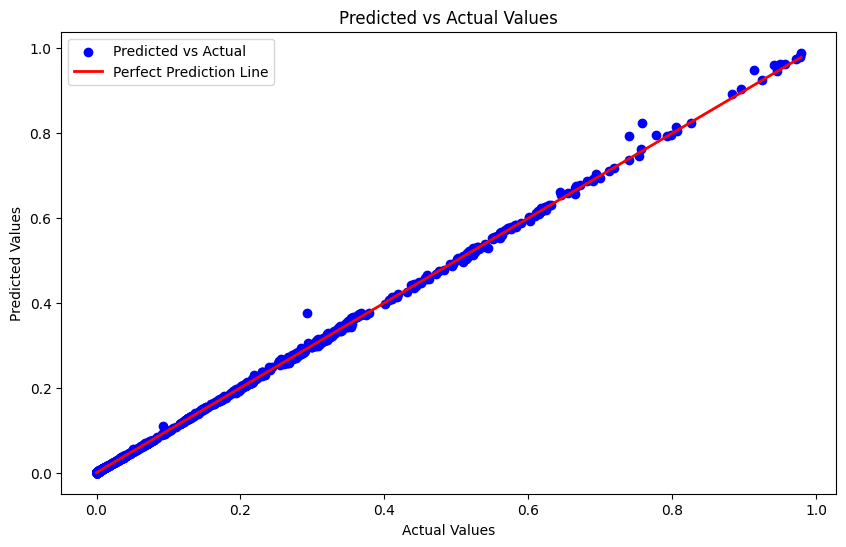

In [ ]:
# Cross Validate to tune the polynomial degree
params = {
    'polynomialfeatures__degree': [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(estimator=model, param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Results
best_degree = grid_search.best_params_['polynomialfeatures__degree']
best_score = grid_search.best_score_
best_model = grid_search.best_estimator_
print(f'Best Polynomial Degree: {best_degree}')
print(f'R2 Score Averaged Across 10 Folds: {best_score}')

# Find R2 score on test set
y_pred = best_model.predict(X_test)
r2_test_data = r2_score(y_test, y_pred)
print(f'R2 Score on Test Data: {r2_test_data}')

# Plot best model prediction vs actual
y_pred = best_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.show()